## Library

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from tensorflow.keras import layers, Model
from imblearn.over_sampling import SMOTE
from scipy.stats import mannwhitneyu
from sklearn.svm import OneClassSVM
from psmpy.functions import cohenD
from psmpy.plotting import *
from psmpy import PsmPy
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import set_matplotlib_hangul # 한글 폰트 변환

Hangul OK in your MAC!


## Data Load
- 데이터 출처:  [[캐글]PUBG Finish Placement Prediction](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/data)

In [3]:
# Load Data
df = pd.read_csv('../data/train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


## Data Summary

|변수|데이터 유형|데이터 설명|
|---|:---|:---|
|assists|int|자신에게 사살되지 못했지만 데미지를 넣은 적의 수|
|boosts|int|도핑 아이템 사용 횟수|
|damageDealt|float|적에게 가한 전체 대미지|
|DBNOs|int|기절시킨 적의 수|
|groupId|object|경기내 식별 ID|
|headshotKills|int|헤드샷으로 죽인 적의 수|
|heals|int|회복 아이템 사용 횟수|
|Id|object|해당 데이터 ID|
|killPlace|int|경기 내 죽인 적의 순위|
|killPoints|int|유저의 레이팅|
|kills|int|경기 내 적을 죽인 수|
|killStreaks|int|짧은 시간 내에 연속으로 적을 죽인 수|
|longestKill|float|사살한 적까지의 거리 최대값|
|matchDuration|int|경기가 진행된 시간 (단위: 초)|
|matchId|object|경기 식별 ID|
|matchType|object|경기 모드(솔로, 듀오, 스쿼드...)|
|numGroups|int|경기 내 참여 그룹 수|
|rankPoints|int|유저의 레이팅|
|revives|int|유저가 팀원을 부활시킨 횟수|
|rideDistance|float|이동수단을 통해 이동한 거리(단위: m)|
|roadKills|int|이동수단으로 살해한 적의 수|
|swimDistance|float|수영으로 이동한 거리(단위: m)|
|teamKills|int|같은 팀원을 살해한 수|
|vehicleDestroys|int|파괴한 이동수단의 수|
|walkDistance|float|걸어서 이동한 거리(단위: m)|
|weaponsAcquired|int|획득한 무기의 수|
|winPoints|int|유저의 ELO레이팅(승리 횟수 기반)|
|winPlacePerc|float|현재 경기에서의 백분위 기반 유저의 순위(종속변수)|

## Data Preprocessing

In [4]:
# Check Data Type
def Check_Data_Type(df, return_data=False):
    df_str = df.select_dtypes(include=['object'])
    df_num = df.select_dtypes(include=['number'])

    print(f"Object Type Length: {df_str.shape[1]}")
    print(f"Num Type Length: {df_num.shape[1]}")

    if return_data: # 출력만 보려할 때
        return df_str, df_num

In [5]:
df.info()
print()
Check_Data_Type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
# 불필요한 컬럼 제거
df.drop(columns={'matchId', 'numGroups', 'maxPlace', 'killPlace', 'matchDuration',
                 'vehicleDestroys', 'killPoints', 'winPoints'}, inplace=True)
df.head()

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,matchType,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,0,0,0.00,0,0,0,0,0,...,squad-fpp,-1,0,0.0000,0,0.00,0,244.80,1,0.4444
1,eef90569b9d03c,684d5656442f9e,0,0,91.47,0,0,0,0,0,...,squad-fpp,1484,0,0.0045,0,11.04,0,1434.00,5,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,1,0,68.00,0,0,0,0,0,...,duo,1491,0,0.0000,0,0.00,0,161.80,2,0.7755
3,4616d365dd2853,a930a9c79cd721,0,0,32.90,0,0,0,0,0,...,squad-fpp,1408,0,0.0000,0,0.00,0,202.70,3,0.1667
4,315c96c26c9aac,de04010b3458dd,0,0,100.00,0,0,0,1,1,...,solo-fpp,1560,0,0.0000,0,0.00,0,49.75,2,0.1875


In [7]:
# 위 'rankPoints' 값에 -1을 조회
rank = df[df['rankPoints'] == -1]
len(rank)

1701810

In [8]:
# rankPoints의 -1을 제거하기엔 데이터 손실이 크기에 0으로 대체
df['rankPoints'] = df['rankPoints'].replace(-1, 0)
df.isna().sum() # 결측치 확인

Id                 0
groupId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
kills              0
killStreaks        0
longestKill        0
matchType          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
walkDistance       0
weaponsAcquired    0
winPlacePerc       1
dtype: int64

In [9]:
# 파생변수 생성
df['total_distance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance'] # 총 이동거리
df['headshot_Rate'] = df['headshotKills'] / df['kills'].replace(0, np.inf) # 킬 수 대비 헤드샷 비율 계산
df['kills_per_distance'] = df['total_distance'] / df['kills'].replace(0, np.inf) # 킬 수 대비 이동거리

df = df.dropna(subset=['winPlacePerc']) # 결측치 제거
df.head()

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired,winPlacePerc,total_distance,headshot_Rate,kills_per_distance
0,7f96b2f878858a,4d4b580de459be,0,0,0.00,0,0,0,0,0,...,0.0000,0,0.00,0,244.80,1,0.4444,244.8000,0.0,0.00
1,eef90569b9d03c,684d5656442f9e,0,0,91.47,0,0,0,0,0,...,0.0045,0,11.04,0,1434.00,5,0.6400,1445.0445,0.0,0.00
2,1eaf90ac73de72,6a4a42c3245a74,1,0,68.00,0,0,0,0,0,...,0.0000,0,0.00,0,161.80,2,0.7755,161.8000,0.0,0.00
3,4616d365dd2853,a930a9c79cd721,0,0,32.90,0,0,0,0,0,...,0.0000,0,0.00,0,202.70,3,0.1667,202.7000,0.0,0.00
4,315c96c26c9aac,de04010b3458dd,0,0,100.00,0,0,0,1,1,...,0.0000,0,0.00,0,49.75,2,0.1875,49.7500,0.0,49.75


## EDA

In [14]:
# boxplot
def box_plot(winner, loser, col):
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))
    sns.boxplot(ax=axes[0], y=winner[col])
    axes[0].set_title('Winner', fontsize=15)
    sns.boxplot(ax=axes[1], y=loser[col], color='orange')
    axes[1].set_title('Loser', fontsize=15)
    plt.tight_layout()
    plt.show()
    print(f"승리유저 평균 {col}: {winner[col].mean():.2f}")
    print(f"패배유저 평균 {col}: {loser[col].mean():.2f}")

# histplot
def hist_plot(df1, col, df2=None, figsize=(8, 6), bins=30, alpha=0.6, color1='skyblue', color2='salmon', label1=None, label2=None, title=None):
        plt.figure(figsize=figsize)

        # 개별 데이터 프레임
        sns.histplot(df1[col], kde=True, bins=bins, alpha=alpha, color=color1, label=label1 if label1 else ('Group 1' if df2 is not None else None))
        
        if df2 is not None: # 두 그룹 비교
            sns.histplot(df2[col], kde=True, bins=bins, alpha=alpha, color=color2, label=label2 if label2 else 'Group 2')
            plt.legend()  # 두 그룹일 때만 범례 표시

        plt.title(title if title else f'{col} Distribution (Histogram + KDE)')
        plt.xlabel(col)
        plt.show() 

# heatmap
def heatmap(df, figsize=(10, 6), target_col=None, threshold=0.4, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12}, cbar=True, title=None):
        corr = df.select_dtypes(include=['number']).corr() # 숫자형 데이터 타입

        if target_col: # 타겟 컬럼과의 상관관계만 추출
            corr = corr[[target_col]].sort_values(by=target_col, ascending=False)
            corr = corr[abs(corr[target_col]) >= threshold].dropna()
            
            title = title or f"'{target_col}'과의 상관관계 (≥ {threshold})"
            plt.figure(figsize=(4, len(corr) * 0.6))
            sns.heatmap(corr.T, annot=annot, fmt=fmt, cmap=cmap, annot_kws=annot_kws, cbar=cbar)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)

        else: # 전체 상관관계 매트릭스
            title = title or "전체 상관관계 히트맵"
            plt.figure(figsize=figsize)
            sns.heatmap(corr, annot=annot, fmt=fmt, cmap=cmap, annot_kws=annot_kws, cbar=cbar)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)

        plt.title(title)
        plt.show()

- 분포 분석

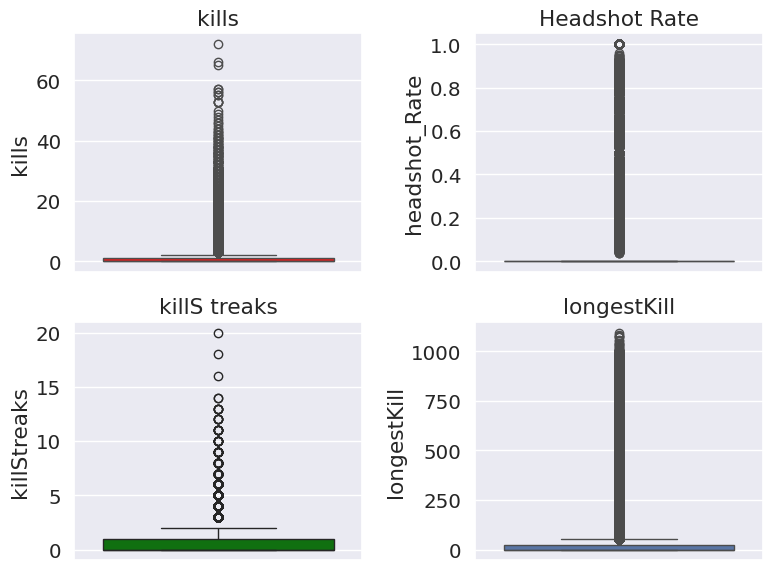

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(ax=axes[0, 0], y=df['kills'], color='red') # 킬
axes[0, 0].set_title('kills')
sns.boxplot(ax=axes[0, 1], y=df['headshot_Rate'], color='orange') # 킬 수 대비 헤드샷 비율
axes[0, 1].set_title('Headshot Rate')
sns.boxplot(ax=axes[1, 0], y=df['killStreaks'], color='green') # 연속으로 킬 처치
axes[1, 0].set_title('killS treaks')
sns.boxplot(ax=axes[1, 1], y=df['longestKill']) # 가장 먼 거리에서 킬(킬을 하고 이동을 많이 할 경우 값이 높게 나올 수 있음
axes[1, 1].set_title('longestKill')             # (예: 킬 후 차량, 자전거 탑승을 해서 값이 높게 나올 수도 있다.)
plt.tight_layout()
plt.show()

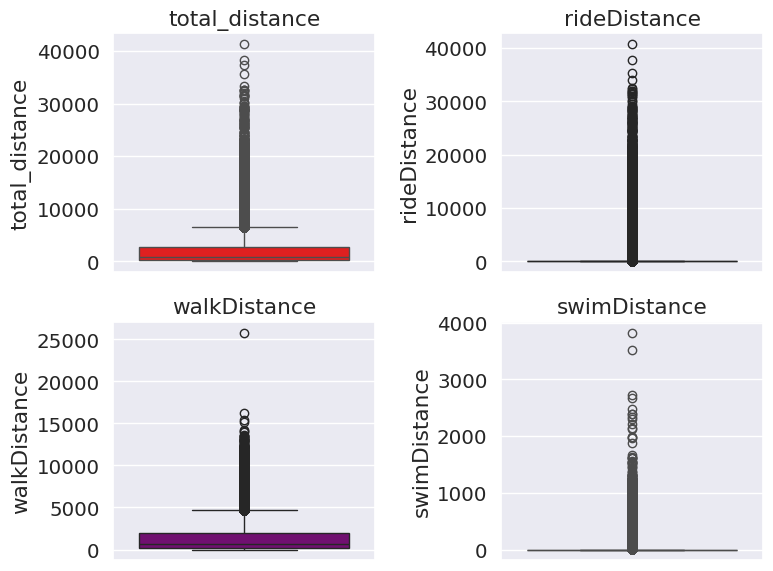

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(ax=axes[0, 0], y=df['total_distance'], color='red') # 총 이동거리
axes[0, 0].set_title('total_distance')
sns.boxplot(ax=axes[0, 1], y=df['rideDistance'], color='green') # 자전거 이동거리
axes[0, 1].set_title('rideDistance')
sns.boxplot(ax=axes[1, 0], y=df['walkDistance'], color='purple') # 걸어서 이동거리
axes[1, 0].set_title('walkDistance')
sns.boxplot(ax=axes[1, 1], y=df['swimDistance']) # 수영 이동거리
axes[1, 1].set_title('swimDistance')

plt.tight_layout()
plt.show()

### 승리 점수 분석

- 승리 점수가 높을 수록 핵 사용자와 관계가 있을거 같기에 분포 분석

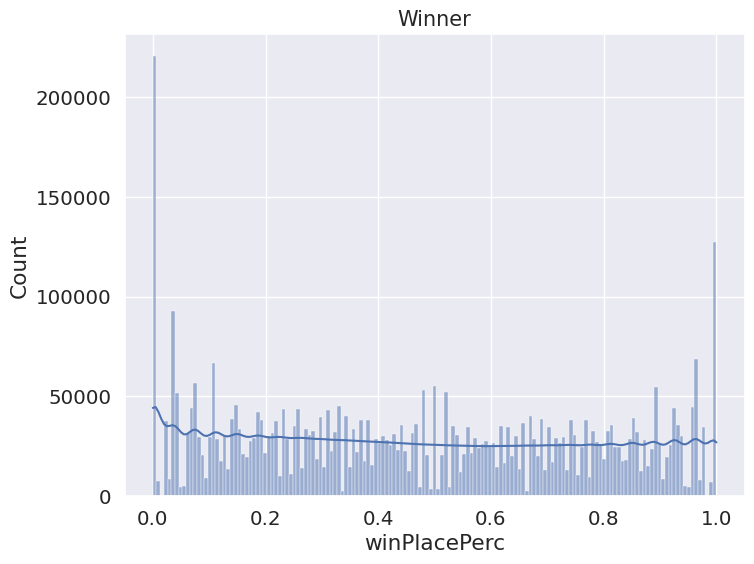

승리 예측 평균 점수: 0.47


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['winPlacePerc'], kde=True)
plt.title('Winner', fontsize=15)
plt.show()

print(f"승리 예측 평균 점수: {df['winPlacePerc'].mean():.2f}")

### 승리 유저 VS 패배 유저 비교
- 승리 유저 : "winPlacePerc" 값이 1인 유저
- 패배 유저 : "winPlacePerc" 값이 1이 아닌 유저
- 두 그룹간 패턴 파악

In [ ]:
winner = df[df['winPlacePerc'] == 1]
loser = df[df['winPlacePerc'] != 1]

print(f"전체 유저: {len(df)}")
print(f"패배 유저 비율: {(len(loser) / len(df)) * 100:.2f}%")
print(f"승리 유저 비율: {(len(winner) / len(df)) * 100:.2f}%")

전체 유저: 4446965
패배 유저 비율: 97.13%
승리 유저 비율: 2.87%


#### 킬수 비교

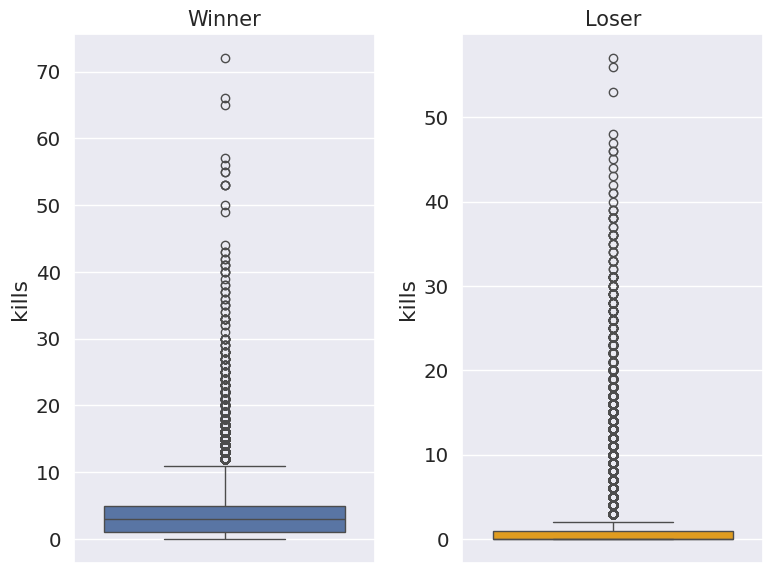

승리유저 평균 kills: 3.63
패배유저 평균 kills: 0.84


In [ ]:
box_plot(winner, loser, 'kills')

#### 헤드샷 비율 비교

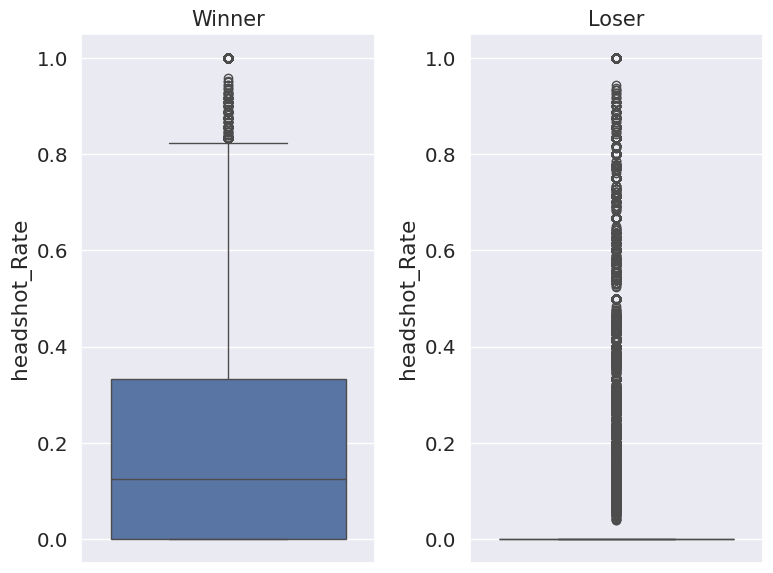

승리유저 평균 headshot_Rate: 0.22
패배유저 평균 headshot_Rate: 0.10


In [ ]:
box_plot(winner, loser, 'headshot_Rate')

#### 어시스트 비교

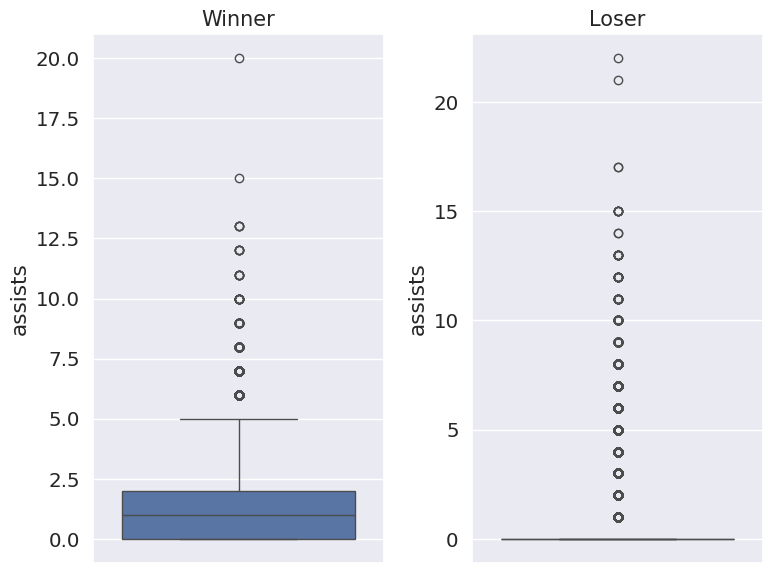

승리유저 평균 assists: 1.10
패배유저 평균 assists: 0.21


In [ ]:
box_plot(winner, loser, 'assists')

#### 총 이동거리 비교

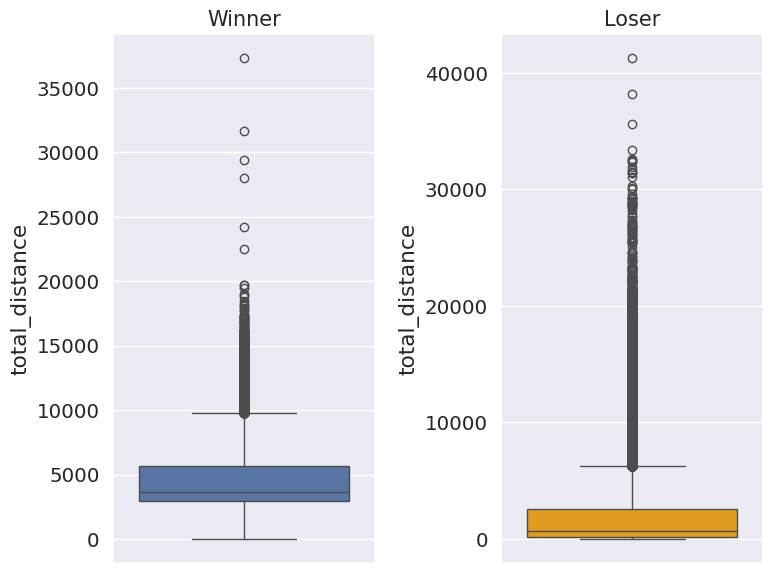

승리유저 평균 total_distance: 4455.76
패배유저 평균 total_distance: 1685.37


In [ ]:
box_plot(winner, loser, 'total_distance')

#### 무기 획득 비교

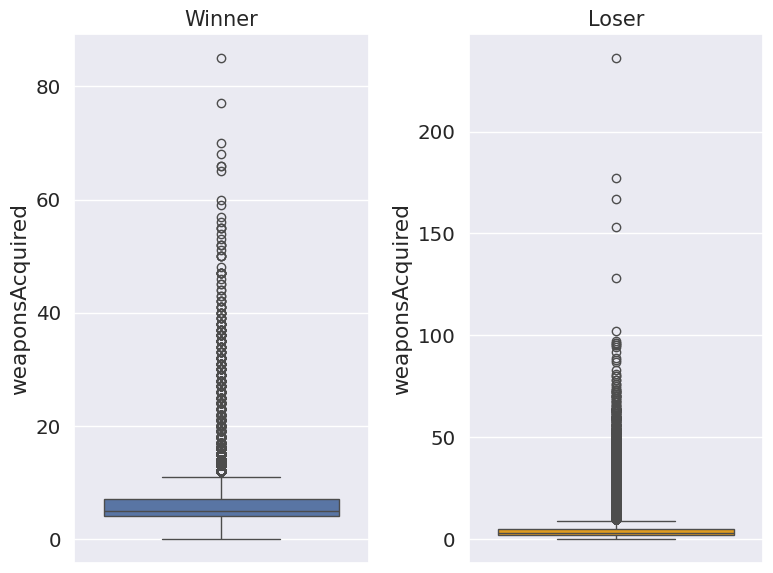

승리유저 평균 weaponsAcquired: 5.68
패배유저 평균 weaponsAcquired: 3.60


In [ ]:
box_plot(winner, loser, 'weaponsAcquired')

### EDA 요약
- 승리 유저는 킬, 헤드샷비율, 어시스트, 총 이동거리, 무기 획득 수 등에서 패배유저보다 높은 수치를 나타낸다.
- 따라서 승리 유저 안에 핵 유저가 있을거라 판단

--------------------------------------

## 유저 분리
- 현재 이상치 라벨이 없기에 모델을 활용하여 핵/일반 유저 분리
- 위 EDA 결과 핵 사용자는 승리한 유저 패턴과 비슷하다고 추정
- 또한 핵을 사용하면 승리 가능성이 높아지기에 상관관계가 있다고 판단
- 최초에는 승리 예측값이 1인 유저들만을 대상으로 분석을 고려했으나, 이는 전체 데이터의 약 3%에 불과하여 심각한 데이터 손실을 초래
- 그래서 승리 예측값의 3분위수인 0.74 이상을 기준으로 범위 조정

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['winPlacePerc'].describe()

,winPlacePerc
count,"4,446,965.00"
mean,0.47
std,0.31
min,0.00
25%,0.20
50%,0.46
75%,0.74
max,1.00


In [12]:
win = df[df['winPlacePerc'] >= 0.74]
print(f"전체 데이터 수: {len(df)}")
print(f"전처리 후 데이터 수: {len(win)}")
print('-' * 30)
print(f"제외한 데이터 비율: {(len(df) - len(win)) / len(df) * 100:.2f}%")
print(f"최종 데이터 비율: {len(win) / len(df) * 100:.2f}")

pd.set_option('display.float_format', '{:,.2f}'.format)

전체 데이터 수: 4446965
전처리 후 데이터 수: 1128703
------------------------------
제외한 데이터 비율: 74.62%
최종 데이터 비율: 25.38


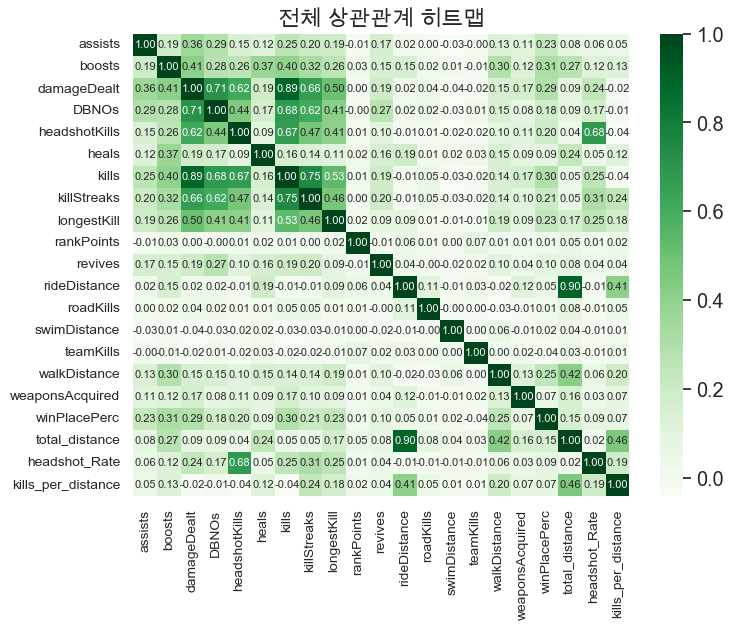

In [ ]:
# 상관관계
heatmap(win, figsize=(8, 6), cmap='Greens', annot_kws={"size": 8})

### 비지도 학습
- Isolation Forest - ML
- AutoEncoder - DL
- 두 모델을 활용해 이상치로 판별된 데이터 간 교집합에 해당하는 유저를 핵 유저로 정의

In [4]:
def kdeplot_mean_std(win, hack_user, normal_user, col):
    """모델 score 간접적인 평가"""

    # KDE 시각화
    plt.figure(figsize=(8, 6))
    sns.kdeplot(normal_user[col], label='Normal_User', fill=True)
    sns.kdeplot(hack_user[col], label='Hack_User', fill=True, color='red')
    plt.title('Normal_User VS Hack_User')
    plt.legend()
    plt.show()

    hack_mean = np.mean(hack_user[col])  # 핵 유저의 평균
    hack_std = np.std(hack_user[col])  # 핵 유저의 표준편차
    normal_mean = np.mean(normal_user[col])  # 정상 유저의 평균
    normal_std = np.std(normal_user[col])  # 정상 유저의 표준편차

    print(f"Normal_User {col} 평균: {normal_mean:.4f} 표준편차: ({normal_std:.4f})")
    print(f"Hack_User {col} 평균: {hack_mean:.4f} 표준편차: ({hack_std:.4f})")
    print('-' * 60)
    print(f"Normal_User Length: {len(normal_user)}")
    print(f"Hack_User Length: {len(hack_user)}")
    print(f"Normal_User Rate: {len(normal_user) / len(win) * 100:.2f}%")
    print(f"Hack_User Rate: {len(hack_user) / len(win) * 100:.2f}%")

### IsolationForest

In [ ]:
scaler = RobustScaler()
feature = scaler.fit_transform(win.drop(columns={'Id', 'groupId', 'matchType', 'rideDistance'})).copy() # rideDistance: 상관관계 9.0

# Isolation Forest 모델
iso_forest = IsolationForest(n_estimators=300, contamination=0.007, max_samples=0.3, random_state=42, n_jobs=-1)
iso_forest.fit(feature)

# 예측 및 이상치 점수 계산
win['iso_label'] = iso_forest.predict(feature)  # -1: 이상치, 1: 정상치
win['iso_score'] = iso_forest.decision_function(feature)  # 이상치 점수

iso_hack_user = win[win['iso_label'] == -1]
iso_normal_user = win[win['iso_label'] == 1]

<ipython-input-24-67bd79283204>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['iso_label'] = iso_forest.predict(feature)  # -1: 이상치, 1: 정상치
<ipython-input-24-67bd79283204>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['iso_score'] = iso_forest.decision_function(feature)  # 이상치 점수


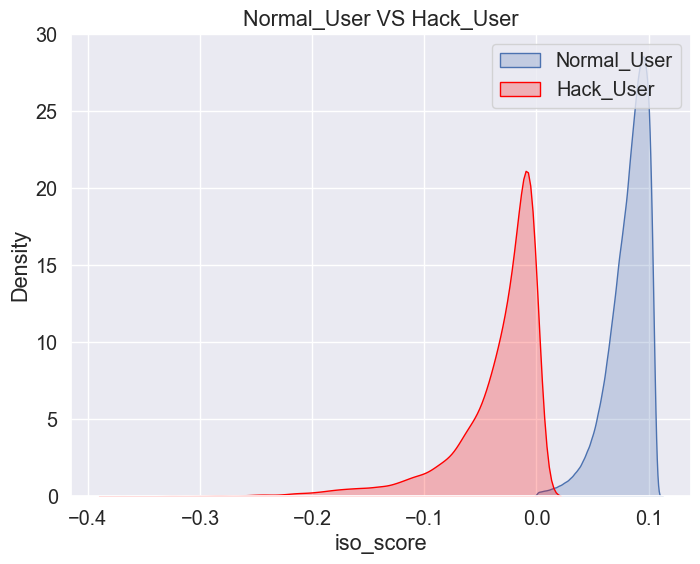

Normal_User iso_score 평균: 0.0814 표준편차: (0.0179)
Hack_User iso_score 평균: -0.0362 표준편차: (0.0428)
------------------------------------------------------------
Normal_User Length: 1120802
Hack_User Length: 7901
Normal_User Rate: 99.30%
Hack_User Rate: 0.70%


In [7]:
kdeplot_mean_std(win, iso_hack_user, iso_normal_user, 'iso_score')

### AutoEncoder


In [ ]:
input_shape = win.select_dtypes(include=['number']).drop(columns={'iso_label', 'iso_score', 'rideDistance'})
print(f"Input shape: {len((input_shape.columns))}")
print(f"Data Length: {len(win)}")

Input shape: 20
Data Length: 1128703


In [ ]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(128, activation="relu", input_shape=(20,)),  # 더 넓은 레이어
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu"),])

        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
             layers.Dropout(0.2),
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(20, activation="linear")])  # 최종 출력을 linear로 변경

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# 손실함수 RMSE
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred))) # MAE가 제공하는 안정성과 MSE의 민감성을 동시에 활용

auto_encoder = Autoencoder()
auto_encoder.compile(optimizer='adam', loss=RMSE)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
data = win.select_dtypes(include=['number']).drop(columns={'iso_label', 'iso_score', 'rideDistance'})

scaler = RobustScaler()
feature = scaler.fit_transform(data)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # 5번의 에포크 동안 개선되지 않으면 학습 중지
history = auto_encoder.fit(feature, feature, epochs=60, batch_size=256, callbacks=[early_stopping])

Epoch 1/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.7541
Epoch 2/60


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.3183
Epoch 3/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.2951
Epoch 4/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.2770
Epoch 5/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 0.2685
Epoch 6/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 0.2659
Epoch 7/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.2573
Epoch 8/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.2486
Epoch 9/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.2385
Epoch 10/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.2353
Epoch 11/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.2327
Epoch 12/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.2300
Epoch 13/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.2245
Epoch 14/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.2162
Epoch 15/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.2190
Epoch 16/60
4409/4409 ━━━

In [ ]:
# 재구성 오류: 이상탐지
reconstructions = auto_encoder.predict(feature)
reconstruction_error = np.sqrt(np.mean(np.square(feature - reconstructions), axis=1)) # RMSE

win['auto_score'] = reconstruction_error
win['auto_score'].describe()

35272/35272 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step


<ipython-input-29-9b5f0afc0c92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['auto_score'] = reconstruction_error


,auto_score
count,"1,128,703.00"
mean,0.12
std,0.10
min,0.01
25%,0.05
50%,0.09
75%,0.18
max,3.19


임계값 (Threshold): 0.4284


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


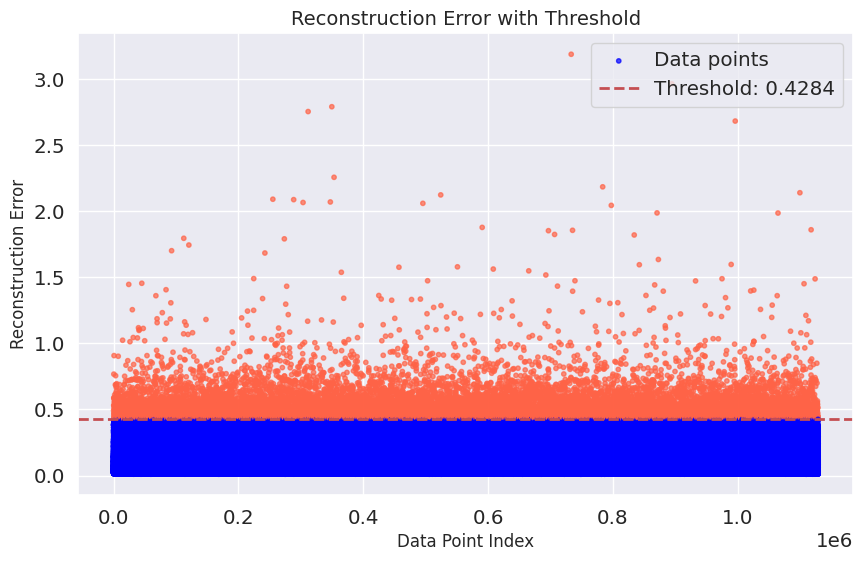

In [ ]:
# 임계값 설정 (평균 + 3 * 표준편차로 설정)
threshold = win['auto_score'].mean() + 3 * win['auto_score'].std()
print(f"임계값 (Threshold): {threshold:.4f}")

colors = ['tomato' if score > threshold else 'blue' for score in win['auto_score']]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(win)), win['auto_score'], c=colors, alpha=0.7, s=10, label='Data points')
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.4f}')
plt.title("Reconstruction Error with Threshold", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Reconstruction Error", fontsize=12)
plt.legend()
plt.show()

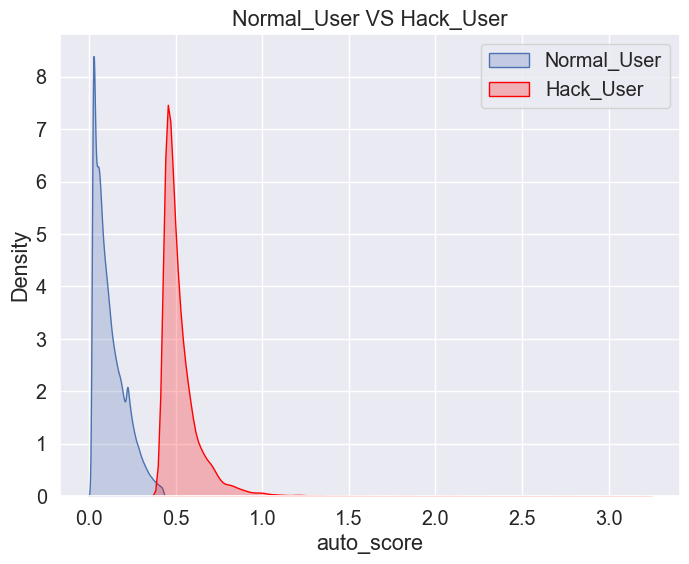

Normal_User auto_score 평균: 0.1189 표준편차: (0.0890)
Hack_User auto_score 평균: 0.5303 표준편차: (0.1395)
------------------------------------------------------------
Normal_User Length: 1113836
Hack_User Length: 14867
Normal_User Rate: 98.68%
Hack_User Rate: 1.32%


In [ ]:
# 핵 유저와 노말 유저 분리
win['auto_label'] = np.where(win['auto_score'] > threshold, -1, 1)

# 분리된 데이터 확인
auto_hack_user = win[win['auto_label'] == -1]  # 핵 유저
auto_normal_user = win[win['auto_label'] == 1]  # 노말 유저

kdeplot_mean_std(win, auto_hack_user, auto_normal_user, 'auto_score') # 시각화 및 평균, 표준편차 함수

#### 두 모델의 교집합

In [ ]:
final_df = win.copy()
final_df['True_label'] = 0

final_df.loc[(final_df['iso_label'] == -1) & (final_df['auto_label'] == -1), 'True_label'] = 1  # True_label : 이진 분류를 위해 0과 1로 설정 / 1 = 핵 유저
final_df = final_df.drop(columns={'iso_score', 'iso_label', 'auto_score', 'auto_label'})

hack_user = final_df[final_df['True_label'] == 1]
normal_user = final_df[final_df['True_label'] == 0]
hack_ratio = len(hack_user) / len(final_df) * 100
normal_ratio = len(normal_user) / len(final_df) * 100

print(f"일반 사용자 수: {len(normal_user)}명")
print(f"핵 사용자 수: {len(hack_user)}명")
print('-' * 50)
print(f"일반 사용자 비율: {normal_ratio:.2f}%")
print(f"핵 사용자 비율: {hack_ratio:.2f}%")

일반 사용자 수: 1125404명
핵 사용자 수: 3299명
--------------------------------------------------
일반 사용자 비율: 99.71%
핵 사용자 비율: 0.29%


### 결과
- Isolation Forest 모델과 Autoencoder 모델을 활용하여 kdeplot 시각화를 통해 두 그룹이 어느 정도 명확하게 분리됨을 확인
- 그러나 완벽히 분리되었다고 보기에는 어려운 점이 있으며, 이는 실무에서도 이상 탐지에서 정상 데이터와 이상치를 완벽히 분리하기 어려운 경우가 많다는 점을 시사한다.
- 이는 실제로 이상 탐지의 목표가 완벽한 분리보다는 효과적으로 이상치를 탐지하는 데 있다는 점에서 비롯되며, 데이터의 복잡성과 이상치 정의의 모호성 등으로 인해 정상 데이터와 이상치 간 경계가 불분명한 경우가 많다.

------------------------------------------------------------------------------

## 라벨 검증
- 라벨의 신빙성을 위해 핵/일반 유저의 통계적 검정

### 가설 설정
- 가설1 : 핵 사용자들은 일반 사용자랑 다르게 헤드샷 비율이 높을 것이다.(정확한 에임 핵을 사용)
- 가설2 : 핵 사용자들은 일반 사용자 보다 무기 획득 수가 많다.(스피드 핵, 월핵 등 사용)
- 가설3 : 핵 사용자들은 일반 사용자 보다 힐 아이템 사용이 많을 것이다.(스피드 핵, 월핵 등 사용)

### 가설 검정
- VIF
- Propensity Score Matching (PSM)
- mannwhitneyu U-검정

#### VIF
- PSM 전 회귀분석을 위해 다중공선성 확인
- VIF(분산팽창요인, Variance Inflation Factor) : 변수간의 다중공선성을 진단하는 수치이며, 범위는 1부터 무한대이다.
- VIF 값이 10 이상이면 다중공선성이 있다고 판단한다.

In [ ]:
number = final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'})
vif_with_constant = add_constant(number)

vif = pd.DataFrame()
vif['features'] = vif_with_constant.columns
vif['VIF Factor'] =  [round(variance_inflation_factor(vif_with_constant.values, i), 4) for i in range(vif_with_constant.shape[1])]

vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif = vif[vif['features'] != 'const']
vif

,features,VIF Factor
1,kills,9.11
2,damageDealt,6.14
3,headshotKills,4.23
4,killStreaks,3.32
5,headshot_Rate,2.63
6,DBNOs,2.36
7,kills_per_distance,1.77
8,total_distance,1.69
9,longestKill,1.54
10,boosts,1.51


### Propensity Score Matching (PSM)

- 두 그룹의 샘플 크기에서 큰 불균형이 존재하여 직접적인 비교가 어렵고 결과의 신뢰성에 문제 발생, 결과 분석에서 발생하는 편향으로 인해 잘못된 결론을 도출할 수 있다.
- PSM을 사용함으로, 그룹 간의 비슷한 조건에서의 차이를 평가할 수 있고, 결과적으로 잠재적인 혼란 변수를 줄이고 분석의 정확도를 높인다.
- LogisticRegression을 사용해서 Propensity Score 계산
- 가설 설정한 변수들은 제외시킨 후 진행

In [ ]:
scaler = RobustScaler()
df_psm = final_df.copy()

scale_features = df_psm.drop(columns={'Id', 'groupId', 'matchType', 'True_label'})
scaled_features = scaler.fit_transform(scale_features)
scaled_df = pd.DataFrame(scaled_features, columns=scale_features.columns)
scaled_df[['Id', 'True_label']] = df_psm[['Id', 'True_label']]
scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.dropna(inplace=True)

# PSM 진행
psm = PsmPy(data=scaled_df, treatment='True_label', indx='Id', exclude=['headshot_Rate', 'weaponsAcquired', 'heals']) # exclude : 제외 컬럼
psm.logistic_ps(balance=True)  # 로지스틱 회귀로 Propensity Score 계산

# Propensity Score 및 로그 계산
scaled_df['propensity_score'] = psm.predicted_data['propensity_score']
scaled_df['propensity_logit'] = scaled_df['propensity_score'].apply(lambda p: np.log(p / (1 - p)) if 0 < p < 1 else np.nan)

# 무한대 및 NaN 값 처리
scaled_df['propensity_logit'].replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.dropna(subset=['propensity_logit'], inplace=True)

# K-최근접 이웃 매칭
psm.knn_matched_12n(matcher='propensity_logit', how_many=1)

matched_df = psm.df_matched
matched_df

<ipython-input-6-566d12468f12>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scaled_df['propensity_logit'].replace([np.inf, -np.inf], np.nan, inplace=True)


,Id,assists,boosts,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,rankPoints,...,roadKills,swimDistance,teamKills,walkDistance,winPlacePerc,total_distance,kills_per_distance,propensity_score,propensity_logit,True_label
0,369b4932998e83,0.0,-1.000000,-0.685558,-0.5,0.0,-0.333333,-1.0,-0.319967,-0.968771,...,0.0,0.000,0.0,-0.470935,0.523129,-0.481732,-0.418641,0.455949,-0.176663,1
1,c68226c9f96e2d,0.0,-0.333333,-0.590274,-0.5,0.0,-0.333333,-1.0,-0.319967,0.029900,...,0.0,0.000,0.0,0.304128,0.637415,-0.116362,-0.418641,0.491304,-0.034788,1
2,7711e1d39407da,2.0,-0.666667,-0.125777,-0.5,0.0,0.000000,0.0,0.657255,-0.968771,...,0.0,0.000,0.0,-0.838248,0.550340,-0.499643,0.486258,0.432038,-0.273540,1
3,89120d2f4e44e0,1.0,-0.666667,-0.657404,-0.5,0.0,0.000000,0.0,-0.251418,-0.968771,...,0.0,16.830,0.0,-0.476832,0.351020,-0.477828,0.511645,0.455484,-0.178536,1
4,4f9967ec4b557f,0.0,-1.000000,0.183181,0.0,0.0,0.333333,0.0,0.708981,0.010631,...,0.0,0.000,0.0,0.250211,-0.387755,-0.141779,0.242043,0.520079,0.080359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,34ed52dab4e290,0.0,-0.333333,0.296892,-0.5,1.0,0.333333,0.0,0.609088,0.029900,...,0.0,0.000,0.0,-1.474473,-0.323810,-0.954805,-0.231043,0.463733,-0.145324,0
1680,9c2d58dd731ba8,0.0,0.000000,-0.677664,-0.5,0.0,-0.333333,-1.0,-0.319967,-0.968771,...,0.0,175.900,0.0,0.657119,0.630612,0.119903,-0.418641,0.470281,-0.119017,0
1681,b9f15d41b509b7,0.0,-0.666667,-0.036929,-0.5,0.0,0.000000,0.0,-0.118757,0.047176,...,0.0,0.000,0.0,-0.576243,-0.336735,0.661636,1.837714,0.498158,-0.007368,0
1682,4f2ae1875592b9,0.0,0.666667,-0.117733,-0.5,1.0,0.333333,0.0,2.471586,0.027907,...,0.0,5.692,0.0,0.218197,-0.372789,0.688917,0.725410,0.546341,0.185896,0


### U 검정
- 데이터 확인 결과 대부분이 비정규성 분포를 나타남으로 u-검정으로 사용
- u 검정 시 p-value 값이 0.05 이하여야 그룹 간 통계적 의미가 유의미하다고 판단
- 귀무 가설: 두 그룹 간에 차이가 없다.
- 대립 가설: 두 그룹 간에 차이가 있다.

In [ ]:
matched_df = matched_df.merge(df_psm[['Id', 'headshot_Rate', 'heals', 'weaponsAcquired']], on='Id', how='left') # 매핑
hack_user_psm = matched_df[matched_df['True_label'] == 1] # 핵 유저
normal_user_psm = matched_df[matched_df['True_label'] == 0] # 일반 유저

print(f'PSM 후 핵 유저: {len(hack_user_psm)}')
print(f'PSM 후 일반 유저: {len(normal_user_psm)}')

PSM 후 핵 유저: 842
PSM 후 일반 유저: 842


In [ ]:
def U_test_boxplot(normal_user, hack_user, col):

  fig, axes = plt.subplots(1, 2, figsize=(8, 6))
  sns.boxplot(normal_user[col], ax=axes[0])
  axes[0].set_title('Normal User', fontsize=15)

  sns.boxplot(hack_user[col], ax=axes[1], color='red')
  axes[1].set_title('Hack User', fontsize=15)

  plt.tight_layout()
  plt.show()

  # u 검정 확인
  u_stat, p_value = mannwhitneyu(hack_user[col], normal_user[col], alternative='greater') # greater = 첫 번쨰 그룹의 값이 두 번쨰 그룹의 값보다 더 많다.

  threshold = 0.05
  if p_value < threshold:
      print('귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재')
  else:
      print('귀무가설을 채택. 두 그룹 간에 유의미한 차이가 존재하지 않다.')
  print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")

#### 검정 1.
- 가설1 : 핵 사용자들은 일반 사용자랑 다르게 헤드샷 비율이 높을 것이다.(정확한 에임 핵을 사용)

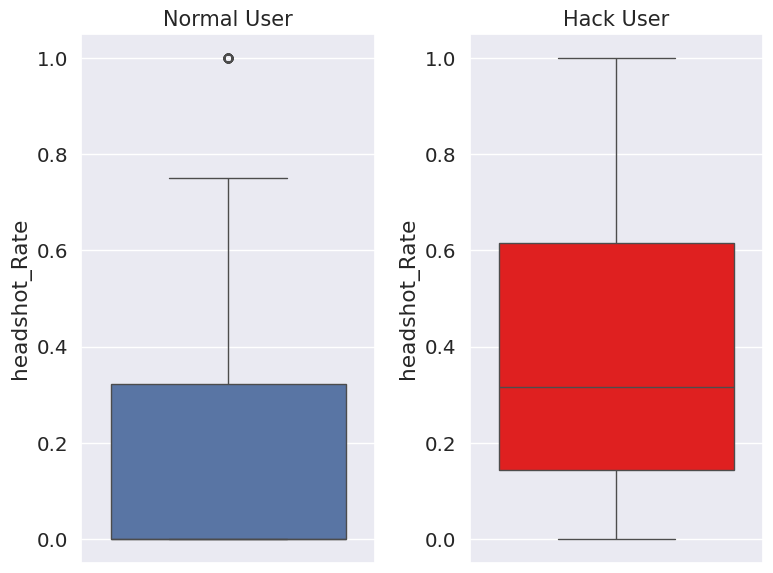

귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재
U-검정 통계값: 523549.5, p-value: 0.0000


In [ ]:
U_test_boxplot(normal_user_psm, hack_user_psm, 'headshot_Rate')

#### 검정 2.
- 가설2 : 핵 사용자들은 일반 사용자 보다 무기 획득 수가 많다.(스피드 핵, 월핵 등 사용)

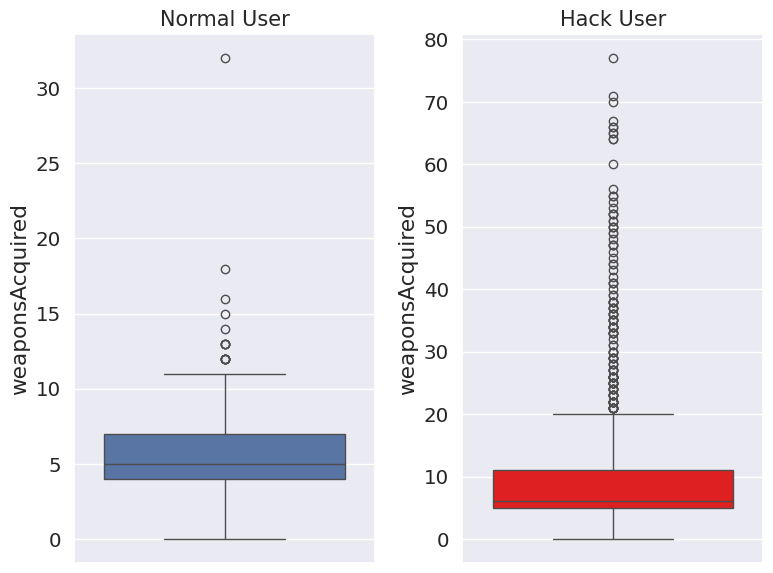

귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재
U-검정 통계값: 468952.0, p-value: 0.0000


In [ ]:
U_test_boxplot(normal_user_psm, hack_user_psm, 'weaponsAcquired')

#### 검정 3.
- 가설3 : 핵 사용자들은 일반 사용자 보다 힐 아이템 사용이 많을 것이다.(스피드 핵, 월핵 등 사용)

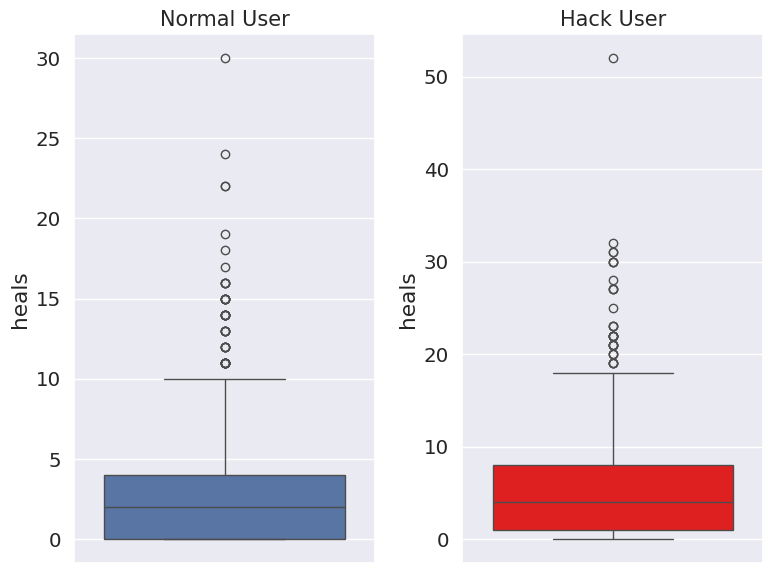

귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재
U-검정 통계값: 436759.0, p-value: 0.0000


In [ ]:
U_test_boxplot(normal_user_psm, hack_user_psm, 'heals')

### 다른 변수 비교
- 이 비교에선 원본 데이터로 U검정 수행(성향 매칭 분석 외 기존 데이터프레임 비교)
- 연속 킬 수
- 총 이동거리

In [ ]:
def U_test_mean_std(normal, hack, col):

    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    sns.boxplot(ax=axes[0], y=normal[col])
    axes[0].set_title('normal', fontsize=15)
    sns.boxplot(ax=axes[1], y=hack[col], color='orange')
    axes[1].set_title('hack', fontsize=15)
    plt.tight_layout()
    plt.show()

    # u 검정 확인
    u_stat, p_value = mannwhitneyu(hack_user[col], normal_user[col])

    threshold = 0.05
    if p_value < threshold:
        print('두 그룹 간에 유의미한 차이가 존재')
    else:
        print('두 그룹 간에 유의미한 차이가 존재하지 않음')
    print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")
    print('-' * 60)
    print(f"일반 유저 평균 {col}: {normal[col].mean():.2f}")
    print(f"핵 유저 평균 {col}: {hack[col].mean():.2f}")

#### 연속 킬 수

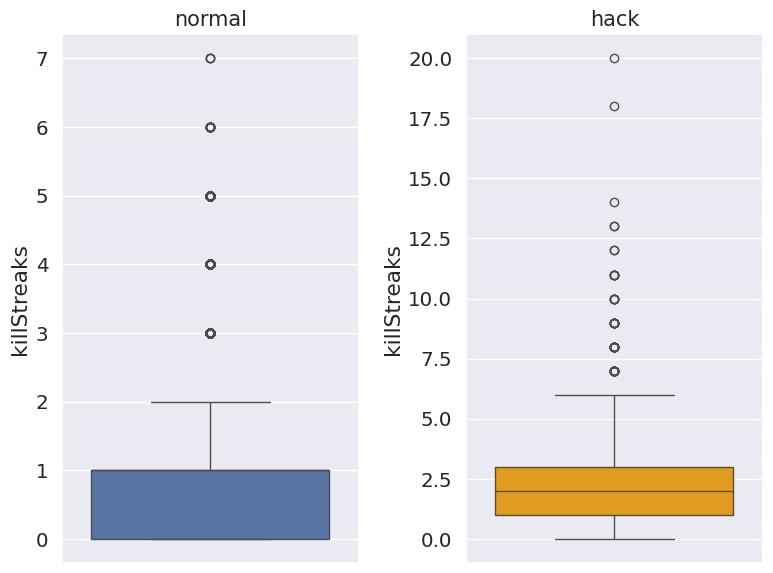

두 그룹 간에 유의미한 차이가 존재
U-검정 통계값: 3008654801.5, p-value: 0.0000
------------------------------------------------------------
일반 유저 평균 killStreaks: 0.92
핵 유저 평균 killStreaks: 2.33


In [ ]:
U_test_mean_std(normal_user, hack_user, 'killStreaks')

#### 총 이동거리

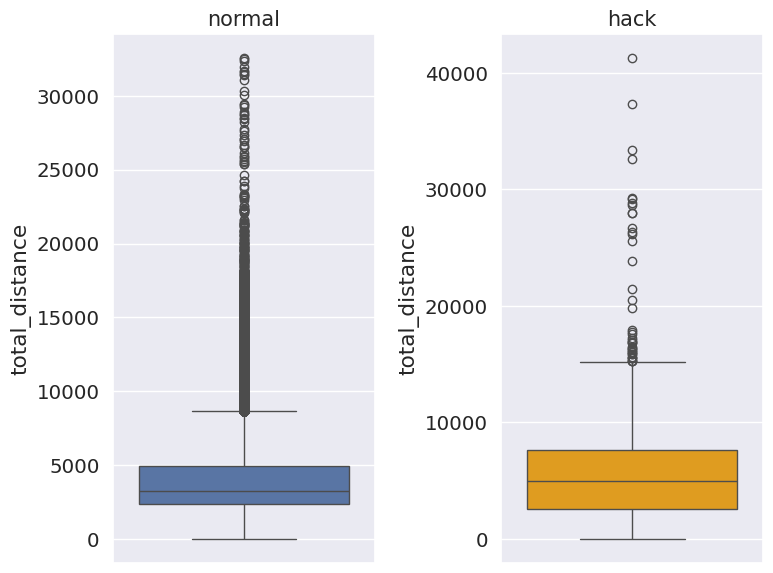

두 그룹 간에 유의미한 차이가 존재
U-검정 통계값: 2288587219.5, p-value: 0.0000
------------------------------------------------------------
일반 유저 평균 total_distance: 3863.85
핵 유저 평균 total_distance: 5304.35


In [ ]:
U_test_mean_std(normal_user, hack_user, 'total_distance')

#### 상관관계 비교

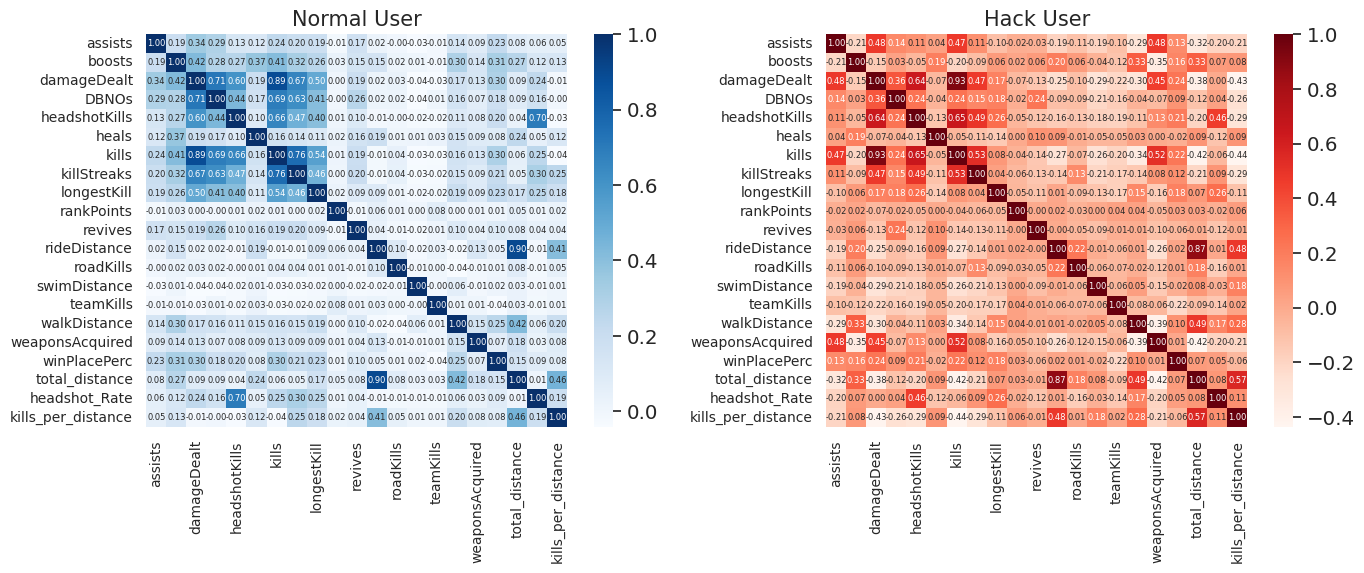

In [ ]:
normal_user_corr = normal_user.select_dtypes(include=['number']).drop(columns=['True_label']).corr()
hack_user_corr = hack_user.select_dtypes(include=['number']).drop(columns=['True_label']).corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(normal_user_corr,  annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 6}, ax=axes[0])
axes[0].set_title('Normal User', fontsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=10)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10)

sns.heatmap(hack_user_corr,  annot=True, fmt='.2f', cmap='Reds', annot_kws={"size": 6}, ax=axes[1])
axes[1].set_title('Hack User', fontsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=10)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

### 검정 결과
- 모든 가설이 유의미한 결과로 대립가설을 채택
- 라벨의 신빙성을 확인
- 이 라벨을 가지고 모델 학습 및 평가

----------------------------------------------------

## 이상탐지(Anomaly detection)
- 지도 학습 : XgBoosts

In [ ]:
def Models_evaluation(y_true, y_pred, y_pred_proba=None):
    """모델 성능 평가 : 정확도, 정밀도, 재현율, F1-Score, ROC AUC """

    metrics = {}

    metrics['accuracy'] = accuracy_score(y_true, y_pred)  # 정확도
    metrics['precision'] = precision_score(y_true, y_pred) # 정밀도
    metrics['recall'] = recall_score(y_true, y_pred) # 재현율
    metrics['f1_score'] = f1_score(y_true, y_pred) # F1-Score

    # ROC AUC (확률값이 있는 경우만 계산)
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
    else:
        metrics['roc_auc'] = None

    for metric, value in metrics.items():
        if value is not None:
            print(f"{metric.capitalize()}: {value:.4f}")
        else:
            print(f"{metric.capitalize()}: Not Available")

    return metrics

### 지도학습
- XGBoost는 지도학습 모델로, 일반적으로 라벨이 있는 데이터를 기반으로 학습한다.
- 하지만 특정 상황에서는 정상 데이터만 학습하여 오차 기반으로 이상치를 탐지하는 방식으로 활용할 수도 있다.
[관련 논문](https://velog.io/@kyyle/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B0%98-%EC%82%AC%EC%9A%A9%ED%9B%84%ED%95%B5%EC%97%B0%EB%A3%8C-%EC%95%88%EC%A0%84%EC%A0%95%EB%B3%B4-%EC%9D%B4%EC%83%81%EC%B9%98-%ED%83%90%EC%A7%80-XGBoost%EC%99%80-OCSVM%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%84%B1%EB%8A%A5-%EB%B9%84%EA%B5%90)
- 본 프로젝트에서는 XGBoost를 지도학습 방식으로 활용하여, 라벨링된 데이터를 통해 핵 유저의 고유한 행동 패턴과 특징을 효과적으로 학습하도록 설계

In [ ]:
"""
현재 핵 유저의 비율은 0.29%로 데이터 불균형이 심한 상태
데이터 증강과 원본 데이터 비율의 성능 비교를 위해 데이터 증강 없이 구현
"""

scaler = RobustScaler()
feature = scaler.fit_transform(final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'}))
label = final_df['True_label']

# 데이터 분리
train_data, test_data, train_label, test_label = train_test_split(
    feature, label, test_size=0.2, random_state=42, stratify=label)

# XGBoost 모델
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=4,
    colsample_bytree=0.8,  # feature 사용 비율
    learning_rate=0.05,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False)

xgb_model.fit(train_data, train_label) # 학습
test_pred = xgb_model.predict(test_data)  # 이진 예측 (0 또는 1)
test_pred_proba = xgb_model.predict_proba(test_data)[:, 1]  # 확률 값 (ROC AUC 계산에 필요)

# 성능 평가
metrics = Models_evaluation(test_label, test_pred, test_pred_proba)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9981
Precision: 0.8211
Recall: 0.4591
F1_score: 0.5889
Roc_auc: 0.9978


- 데이터 증강을 하지 않아도 꽤 준수한 성능을 보여준다.
- 그러나 현재 이상치 비율이 0.29%로 매우 낮은 경우, 모델이 대부분의 데이터를 정상 데이터로 판단할 가능성이 크다.
- 따라서 이상치를 효과적으로 탐지하기 위해 데이터 증강 기법인 스모트(SMOTE)를 사용

In [ ]:
"""
이번엔 스모트 기법 활용해 핵 유저의 데이터를 증강하는 기법으로 실험
XGBoost 모델은 가중치 옵션을 따로 지정하는 파라미터가 있지만
명확히 해석을 하기가 까다롭기 떄문에 정확한 비율로 조정 할 수 있는
스모트 기법을 사용
"""

scaler = RobustScaler()
feature = scaler.fit_transform(final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'}))
label = final_df['True_label']

# SMOTE 적용 (핵 유저 비율을 2%로 증강)
smote = SMOTE(sampling_strategy=0.02, random_state=42)
feature_resampled, label_resampled = smote.fit_resample(feature, label)

# 데이터 분리
train_data, test_data, train_label, test_label = train_test_split(
    feature_resampled, label_resampled, test_size=0.2, random_state=42, stratify=label_resampled)

# XGBoost 모델
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=4,
    colsample_bytree=0.8, # feature 사용 비율
    learning_rate=0.05,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False)

xgb_model.fit(train_data, train_label) # 학습
test_pred = xgb_model.predict(test_data)  # 이진 예측 (0 또는 1)
test_pred_proba = xgb_model.predict_proba(test_data)[:, 1]  # 확률 값 (ROC AUC 계산에 필요)

# 성능 평가
metrics = Models_evaluation(test_label, test_pred, test_pred_proba)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:33:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9975
Precision: 0.9628
Recall: 0.9092
F1_score: 0.9352
Roc_auc: 0.9996


--------------------------------------------------------------------------------

# 회고

- 본 프로젝트에서는 다양한 모델(XGBoost, Autoencoder, Isolation Forest)을 활용하여 이상치를 탐지하고 핵 유저의 패턴을 분석
- 비지도 학습 및 준지도 학습 접근법을 통해 라벨 없는 데이터에서 이상치를 탐지하고, 라벨링한 데이터로 XGBoost를 활용해 핵 유저의 특성을 효과적으로 학습
- 하지만 핵 유저의 고유 패턴이 담긴 라벨이 없어서 모델이 이상치 값을 핵 유저로 판단하는 듯 하다.
- 프로젝트를 통해 핵 유저 탐지가 단순 이상치 탐지에서 끝나는 것이 아니라, 고유한 행동 패턴을 정량적으로 정의하고 이를 학습하는 과정이 중요함을 깨달았다.
- 향후에는 더 다양한 반지도 학습 모델을 적용하거나, 인과추론 기법을 통해 핵 유저의 행동 원인을 분석하는 방향으로 확장할 계획